In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [402]:

df = pd.read_excel('data_432.xlsx')
df

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq
0,1,23.0,1,107.0,192,1,2,4.0,3,1,2,4,7,2,12,2
1,2,22.0,2,49.0,160,1,2,5.0,2,1,1,3,7,2,3,3
2,3,23.0,1,56.0,175,1,2,8.0,3,3,1,3,8,2,8,4
3,4,21.0,2,53.0,170,2,2,4.0,2,4,2,3,8,2,2,4
4,5,53.0,2,57.0,162,2,3,1.0,2,3,4,2,6,2,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,428,67.0,2,70.0,164,2,5,1.0,5,4,1,3,8,2,30,1
428,429,55.0,1,65.0,176,1,2,4.0,1,2,4,3,6,2,1,4
429,430,54.0,1,80.0,172,1,2,3.0,2,2,3,3,7,1,100,2
430,431,55.0,2,54.0,158,2,5,0.0,5,4,4,4,6,2,0,1


In [403]:
df[(df["sex"] == 2)&(df["tolerance"]<=30)]["tolerance"].mean()

9.263803680981596

In [404]:
df = df.dropna()

In [405]:
# check all the free response questions
# fix the value manually in excel
# Check age range
df[~df['age'].isin(range(1,101))]

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [406]:
# Check weight range
df[~((df['weight'] > 0) & (df['weight'] < 200))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [407]:
# Check hight range, fix the error manually
df[~((df['hight'] > 0) & (df['hight'] < 220))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [408]:
# Check drinking_freq range, fix the error manually
df[~((df['drinking_freq'] > 0) & (df['drinking_freq'] < 31))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [409]:
# Check sleep_length range, fix the error manually
df[~((df['sleep_length'] > 0) & (df['sleep_length'] < 15))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


In [410]:
# Check tolerance range, fix the error manually
df[~((df['tolerance'] >= 0) & (df['tolerance'] <= 100))] 

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq


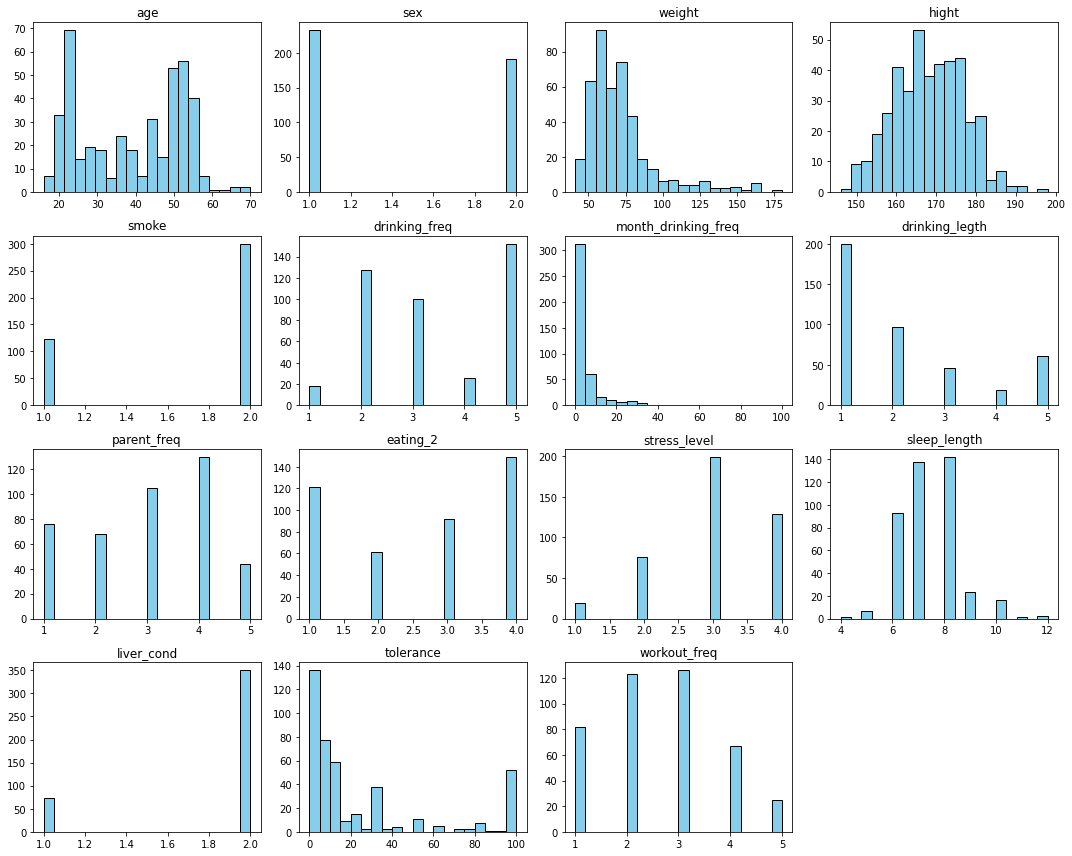

In [411]:
# doning some feature engineering
plt.figure(figsize=(15, 12), facecolor='w')

for i, column in enumerate(df.columns[1:], 1):
    plt.subplot(4, 4, i)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()

In [412]:
# data cleanning step 2
# remove people Rarely drink but their tolerance is higher than 50
df = df[~((df["drinking_freq"] == 5) & (df["tolerance"] > 50))]



# drop stress_level feature because it is not a good feature to predict tolerance
df = df.drop(columns=["stress_level"]) 

# drop the id column
df = df.drop(columns=["id"])

(array([136.,  77.,  59.,   9.,  15.,   2.,  38.,   2.,   4.,   0.,  11.,
          0.,   4.,   0.,   2.,   2.,   4.,   1.,   1.,  41.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

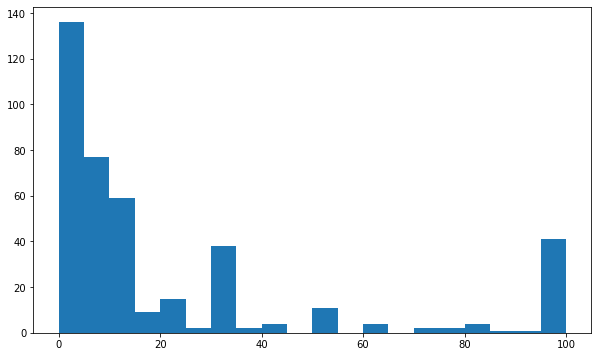

In [413]:
plt.figure(figsize=(10,6),facecolor='white')
plt.hist(df["tolerance"],bins=20)

In [414]:
# convert multiple choice answers to categorie values
df.loc[df["smoke"] == 2, "smoke"] = 0 
df.loc[df["sex"] == 1, "sex"] = "Male"
df.loc[df["sex"] == 2, "sex"]= "Female"


df.loc[df["drinking_freq"] == 1, "drinking_freq"] = "Daily"
df.loc[df["drinking_freq"] == 2, "drinking_freq"] = "Weekly"
df.loc[df["drinking_freq"] == 3, "drinking_freq"] = "Monthly"
df.loc[df["drinking_freq"] == 4, "drinking_freq"] = "Yearly"
df.loc[df["drinking_freq"] == 5, "drinking_freq"] = "Rarely"

df.loc[df["parent_freq"] == 1, "parent_freq"] = "Very often"
df.loc[df["parent_freq"] == 2, "parent_freq"] = "Often"
df.loc[df["parent_freq"] == 3, "parent_freq"] = "Not often"
df.loc[df["parent_freq"] == 4, "parent_freq"] = "Barely"
df.loc[df["parent_freq"] == 5, "parent_freq"] = "Never"

df.loc[df["eating_2"] == 1, "eating_2"] = "Always"
df.loc[df["eating_2"] == 2, "eating_2"] = "Often"
df.loc[df["eating_2"] == 3, "eating_2"] = "Sometimes"
df.loc[df["eating_2"] == 4, "eating_2"] = "Never"

df.loc[df["liver_cond"] == 2, "liver_cond"] = 0 

df.loc[df["workout_freq"] == 1, "workout_freq"] = "Very often"
df.loc[df["workout_freq"] == 2, "workout_freq"] = "Often"
df.loc[df["workout_freq"] == 3, "workout_freq"] = "Not often"
df.loc[df["workout_freq"] == 4, "workout_freq"] = "Barely"
df.loc[df["workout_freq"] == 5, "workout_freq"] = "Never"

In [415]:
df['tol_cat'] = df['tolerance'].apply(lambda x : "poor" if x < 2 else ("average" if x < 5 else ("ok" if x < 10 else ("good" if x < 18 else ('"excellent"' if x < 25 else "outstanding")))))

## Part 2
Molding

Split Traning Set and Testing Set

In [416]:
y = df['tol_cat']
x = pd.get_dummies(df.drop(['tol_cat'], axis=1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45)

## Multiclass Logistic Regression

In [417]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

#### Check our accuracy on testing data for Multclass logistic regression

In [418]:
y_pred = logreg.predict(x_test)
accuracy_log = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print(f"Accuracy on test set: {accuracy_log}")

Confusion Matrix : 
 [[ 5  0  3  0  0  0]
 [ 0 34  0  0  0  3]
 [ 0  0 30  0  0  0]
 [ 0  7  2 30  0  0]
 [ 1  0  0  0 48  0]
 [ 0  3  0  0  0 18]]
Accuracy on test set: 0.8967391304347826


## Random Forest

1. use cv to find max feature

In [419]:

grid_values = {'max_features': np.linspace(1,16,16, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf = RandomForestClassifier() 

# use 5-fold cross validation 
cv = KFold(n_splits=5, shuffle=True) 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=cv,verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s
[CV] END max_features=2, min_samples_leaf=5, n_e

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='accuracy', verbose=2)

In [420]:
max_features = rf_cv.cv_results_['param_max_features'].data
acc = rf_cv.cv_results_['mean_test_score']

print('Grid best parameter max_features (max. accuracy): ', rf_cv.best_params_['max_features'])
print('Grid best score (accuracy): ', rf_cv.best_score_)

Grid best parameter max_features (max. accuracy):  14
Grid best score (accuracy):  0.9687878787878788


In [421]:
y_pred = rf_cv.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print(f"Accuracy on test set is: {accuracy_rf}")


Confusion Matrix : 
 [[ 1  0  7  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 30  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 49  0]
 [ 0  3  0  0  0 18]]
Accuracy on test set is: 0.9456521739130435


## CART Model

In [422]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),# the choice of alpha, ranging from 0 to 0.2
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtc = DecisionTreeClassifier()

cv = KFold(n_splits=5,shuffle=True) 

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) 

dtc_cv_acc.fit(x_train, y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0....
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             sco

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  1.0
Node count = 11


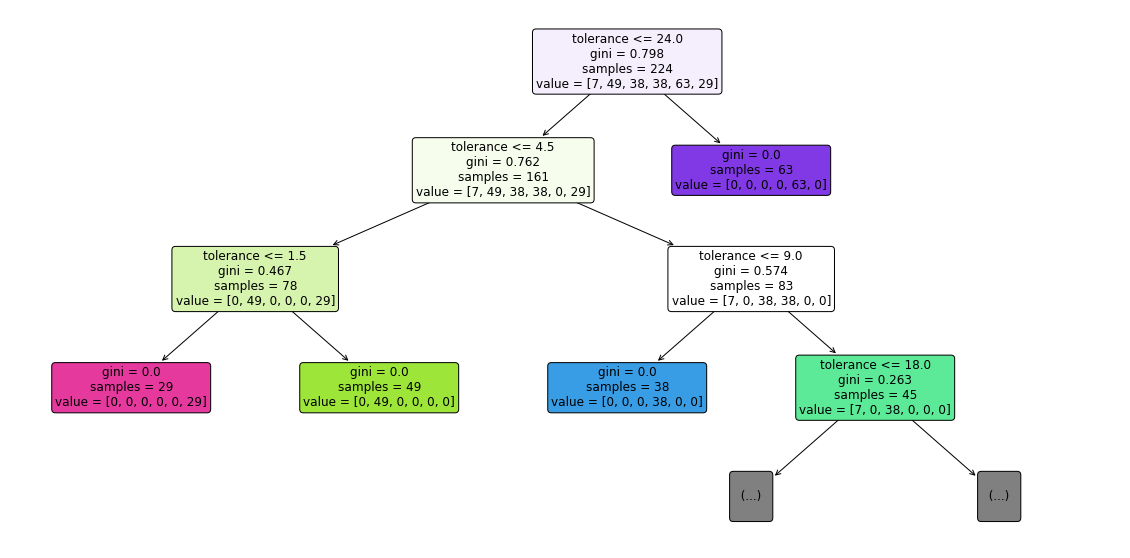

In [423]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=x_train.columns, 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [424]:
y_pred = dtc_cv_acc.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_CART = accuracy_score(y_test, y_pred)

print("Confusion Matrix : \n", cm)
print(f"Accuracy on testing set: {accuracy_CART}")

Confusion Matrix : 
 [[ 8  0  0  0  0  0]
 [ 0 37  0  0  0  0]
 [ 0  0 30  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 49  0]
 [ 0  0  0  0  0 21]]
Accuracy on testing set: 1.0


## Boostrap CI

In [425]:
print(f"Now we have accuracy score on testing set for \n Multiclass Logistic Regression: {accuracy_log} \n Random Forest: {accuracy_rf} \n CART: {accuracy_CART}")

Now we have accuracy score on testing set for 
 Multiclass Logistic Regression: 0.8967391304347826 
 Random Forest: 0.9456521739130435 
 CART: 1.0


In [429]:
def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label)
    output_df = pd.DataFrame(output_array)
    return output_df

In [434]:
bs_output_rf = bootstrap_validation(x_test,y_test,y_train,rf_cv.best_estimator_,
                                 metrics_list=[accuracy_score],
                                 sample = 1000)
bs_output_log = bootstrap_validation(x_test,y_test,y_train, logreg,
                                 metrics_list=[accuracy_score],
                                 sample = 1000)
bs_output_cart = bootstrap_validation(x_test,y_test,y_train, dtc_cv_acc.best_estimator_,
                                 metrics_list=[accuracy_score],
                                 sample = 1000)

(1000, 1)
(1000, 1)
(1000, 1)


In [437]:
# The 95% confidence interval
CI_rf = [0, 0]
CI_rf_0 = np.quantile(bs_output_rf.iloc[:,0]-accuracy_rf,np.array([0.025,0.975]))
CI_rf[0] = accuracy_rf - CI_rf_0[1]
CI_rf[1] = accuracy_rf - CI_rf_0[0]

CI_cart = [0, 0]
CI_cart_0 = np.quantile(bs_output_cart.iloc[:,0]-accuracy_CART,np.array([0.025,0.975]))
CI_cart[0] = accuracy_rf - CI_cart_0[1]
CI_cart[1] = accuracy_rf - CI_cart_0[0]

CI_log = [0, 0]
CI_log_0 = np.quantile(bs_output_log.iloc[:,0]-accuracy_log,np.array([0.025,0.975]))
CI_log[0] = accuracy_rf - CI_log_0[1]
CI_log[1] = accuracy_rf - CI_log_0[0]

print("The 95-percent confidence interval of accuracy on random forest  is %s" % CI_rf) #0.5,0.64
print("The 95-percent confidence interval of accuracy on CART is %s" % CI_cart) #0.5,0.64
print("The 95-percent confidence interval of accuracy on logistic regression is %s" % CI_log) #0.5,0.64

The 95-percent confidence interval of accuracy on random forest  is [0.9130434782608695, 0.983695652173913]
The 95-percent confidence interval of accuracy on CART is [0.9456521739130435, 0.9456521739130435]
The 95-percent confidence interval of accuracy on logistic regression is [0.9021739130434783, 0.9891304347826086]
